# Brianna Thomas HW 1

Here are my plots of Stripe 82 in the Higher-Level Catalogue (HLC).

In [11]:
import pandas as pd
from astropy.io import fits
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import astroML
%matplotlib inline
import scipy
from astroML.stats import binned_statistic_2d
from astroML.plotting import hist

### Proper Motions

In [2]:
def plot_stars(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #----filters-----#
    
    stars=table['MEAN_OBJECT_TYPE'] > 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    gclip=table['MEAN_PSFMAG_CLIP'][:,1] != 0
    rclip=table['MEAN_PSFMAG_CLIP'][:,2] != 0
    iclip=table['MEAN_PSFMAG_CLIP'][:,3] != 0
    m=stars*raclip*declip*gclip*rclip*iclip
    
    table=table[m]
    
    #----proper motion----#
    
    rapm=np.abs(table['RA_PM_CLIP'])
    decpm=np.abs(table['DEC_PM_CLIP'])
    
    #---colors----#
    u=table['MEAN_PSFMAG_CLIP'][:,0]
    g=table['MEAN_PSFMAG_CLIP'][:,1]
    r=table['MEAN_PSFMAG_CLIP'][:,2]
    i=table['MEAN_PSFMAG_CLIP'][:,3]
    z=table['MEAN_PSFMAG_CLIP'][:,4]
    
    #---------------------------create figure----------------------------#
    
    fig = plt.figure(figsize=[15,8])
    
    #----Set pretty cmaps-----#
    
    copper = plt.cm.copper
    multicolor = plt.cm.rainbow
    greys= plt.cm.Greys
    
    
    #---------------------------stats----------------------------#
    
    #---bin size (robust)---$
    #iqrx=scipy.stats.iqr(g-i)
    #xw=(2*iqrx)/len(g-i)**(1/3)
    #xbins=np.arange(0,max((g-i)), xw)
    #iqry=scipy.stats.iqr(r)
    #yw=(2*iqry)/len(r)**(1/3)
    #ybins=np.arange(0,max((r)), yw)
    
    "I tried to use these robust bins, but it distored my plots. I used 150, but any ideas?"
    
    #------histogram----------#
    N, xedges, yedges = binned_statistic_2d(g-i, r, g-i, 'count', bins=150)
    rapm_median, xedges, yedges = binned_statistic_2d(g-i, r, rapm, 'median', bins=150)
    decpm_median, xedges, yedges = binned_statistic_2d(g-i, r, decpm,'median', bins=150)
    
    #---------------------------subplots----------------------------#
    #-----1st plot------#
    ax = plt.subplot(131)
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(np.log10(N.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('$log(count)$')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    #-----2nd plot------#
    ax = plt.subplot(132)
    plt.title('Stars' +  " " + str(int(round(min(ra)))) + '< RA <' + str(int(round(max(ra))))
             + "(deg)" )
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(rapm_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('RA Proper Motion')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 5)[2:]
    plt.contour(np.log10(N.T), 4, colors='k', extent=[xedges[0], xedges[-1], yedges[0], 
                                                      yedges[-1]])
    
    #-----3rd plot------#
    ax = plt.subplot(133)
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(decpm_median.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]],aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('DEC Proper Motion')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 5)[2:]
    plt.contour(np.log10(N.T), 4, colors='k', extent=[xedges[0], xedges[-1], yedges[0], 
                                                      yedges[-1]])

def plot_galaxies(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #----filters-----#
    
    galaxies=table['MEAN_OBJECT_TYPE'] < 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    gclip=table['MEAN_PSFMAG_CLIP'][:,1] != 0
    rclip=table['MEAN_PSFMAG_CLIP'][:,2] != 0
    iclip=table['MEAN_PSFMAG_CLIP'][:,3] != 0
    m=galaxies*raclip*declip*gclip*rclip*iclip
    
    table=table[m]
    
    #----proper motion----#
    
    rapm=np.abs(table['RA_PM_CLIP'])
    decpm=np.abs(table['DEC_PM_CLIP'])
    
    #---colors----#
    u=table['MEAN_PSFMAG_CLIP'][:,0]
    g=table['MEAN_PSFMAG_CLIP'][:,1]
    r=table['MEAN_PSFMAG_CLIP'][:,2]
    i=table['MEAN_PSFMAG_CLIP'][:,3]
    z=table['MEAN_PSFMAG_CLIP'][:,4]
    
    #---------------------------create figure----------------------------#
    
    fig = plt.figure(figsize=[15,8])
    
    #----Set pretty cmaps-----#
    
    copper = plt.cm.copper
    multicolor = plt.cm.rainbow
    greys= plt.cm.Greys
    
    
    #---------------------------stats----------------------------#
    
    #---bin size (robust)---$
    #iqrx=scipy.stats.iqr(g-i)
    #xw=(2*iqrx)/len(g-i)**(1/3)
    #xbins=np.arange(0,max((g-i)), xw)
    #iqry=scipy.stats.iqr(r)
    #yw=(2*iqry)/len(r)**(1/3)
    #ybins=np.arange(0,max((r)), yw)
    
    #------histogram----------#
    N, xedges, yedges = binned_statistic_2d(g-i, r, g-i, 'count', bins=150)
    rapm_median, xedges, yedges = binned_statistic_2d(g-i, r, rapm, 'median', bins=150)
    decpm_median, xedges, yedges = binned_statistic_2d(g-i, r, decpm,'median', bins=150)
    
    #---------------------------subplots----------------------------#
    #-----1st plot------#
    ax = plt.subplot(131)
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(np.log10(N.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('$log(count)$')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    #-----2nd plot------#
    ax = plt.subplot(132)
    plt.title('Galaxies' + " " + str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))) + "(deg)")
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(rapm_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('RA Proper Motion')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 5)[2:]
    plt.contour(np.log10(N.T), 7, colors='k', extent=[xedges[0], xedges[-1], yedges[0], 
                                                      yedges[-1]])
    
    #-----3rd plot------#
    ax = plt.subplot(133)
    plt.xlabel('$g-i$')
    plt.ylabel('$r$')
    plt.imshow(decpm_median.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]],aspect='auto', interpolation='nearest', cmap=multicolor)
    
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('DEC Proper Motion')
    #plt.clim(-2.5, 0.5)
    
    plt.gca().invert_yaxis()
    
    # Draw density contours over the colors
    levels = np.linspace(0, np.log10(N.max()), 5)[2:]
    plt.contour(np.log10(N.T), 7, colors='k', extent=[xedges[0], xedges[-1], yedges[0], 
                                                      yedges[-1]])

/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:179: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:206: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:224: RuntimeWarning: divide by zero encountered in log10


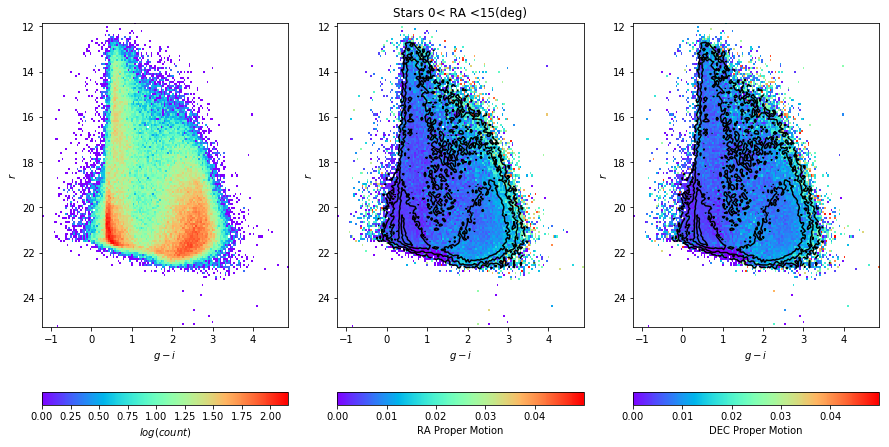

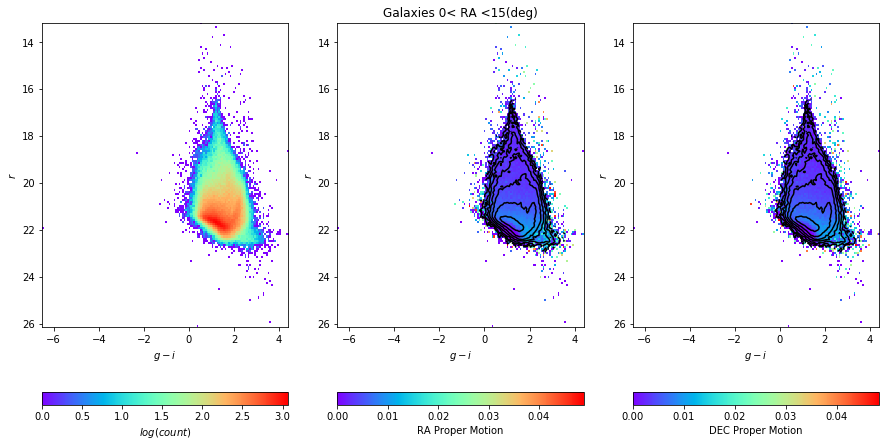

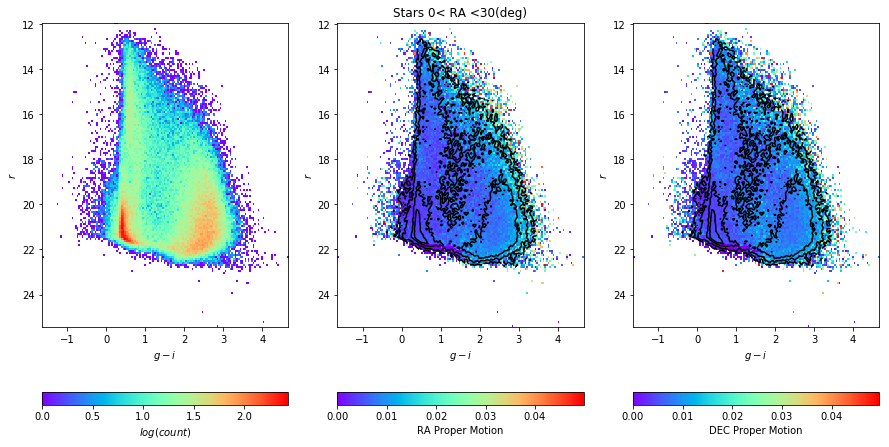

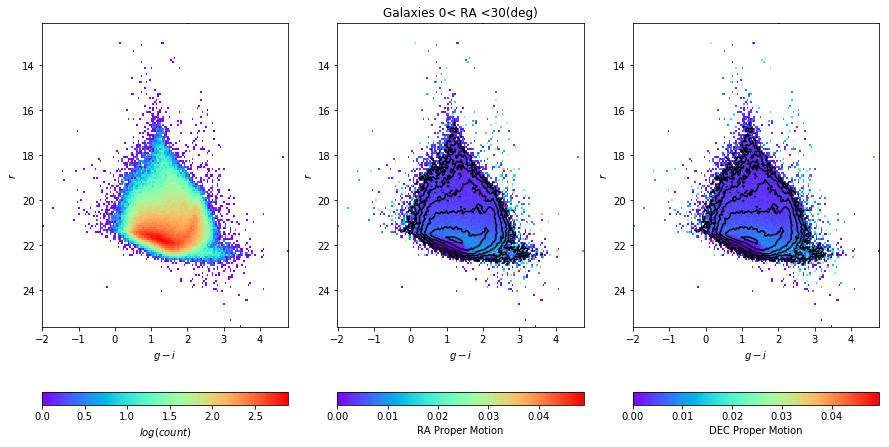

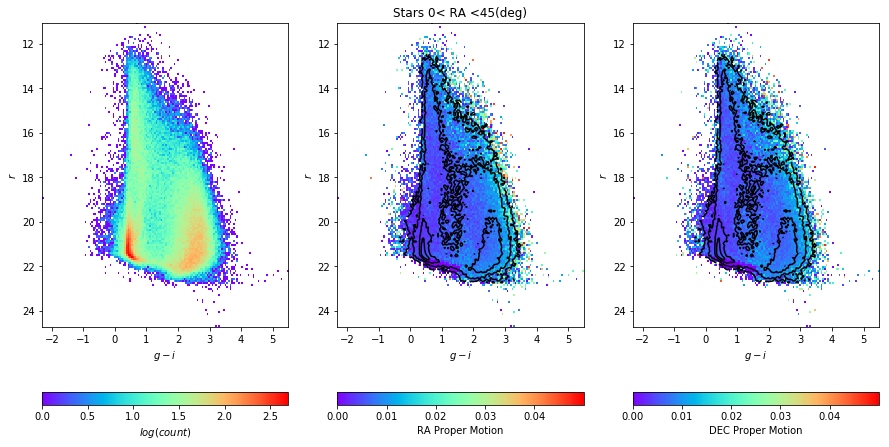

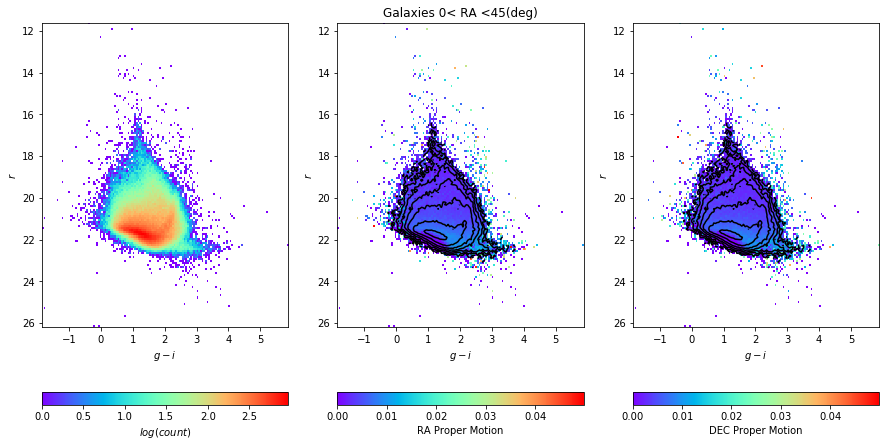

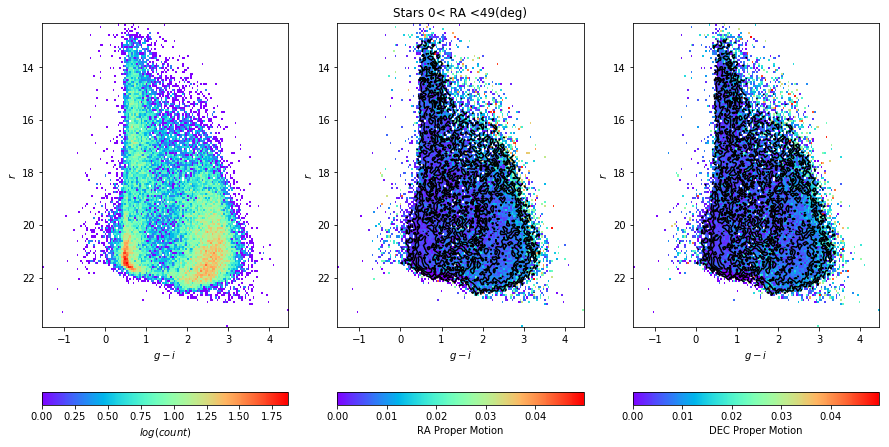

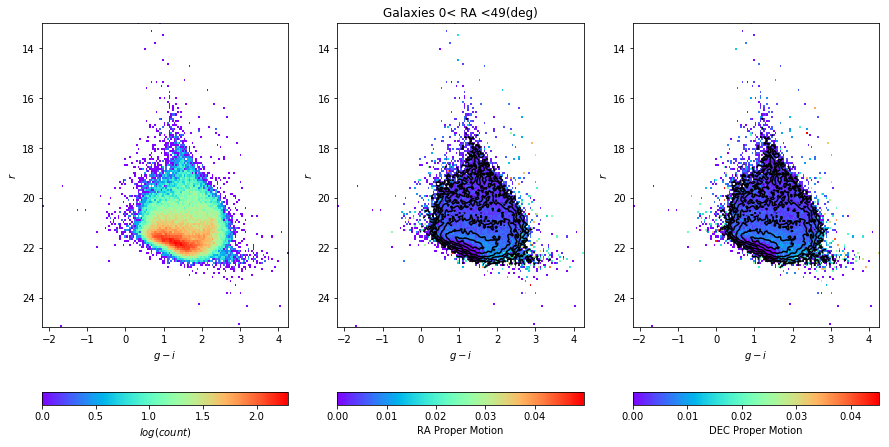

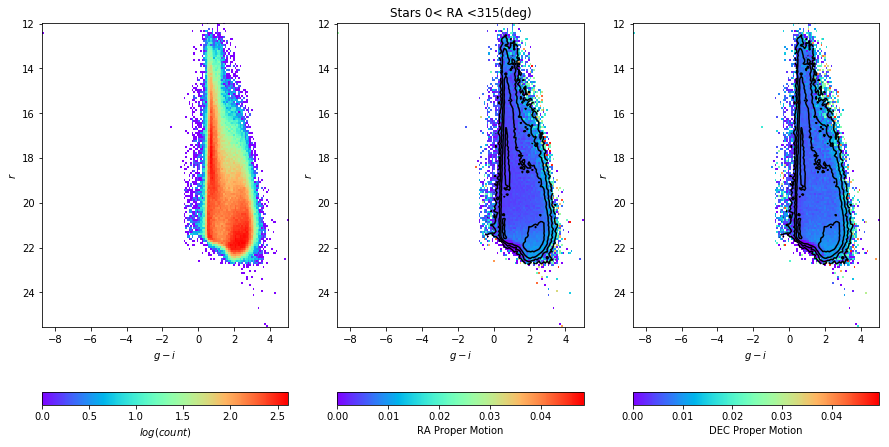

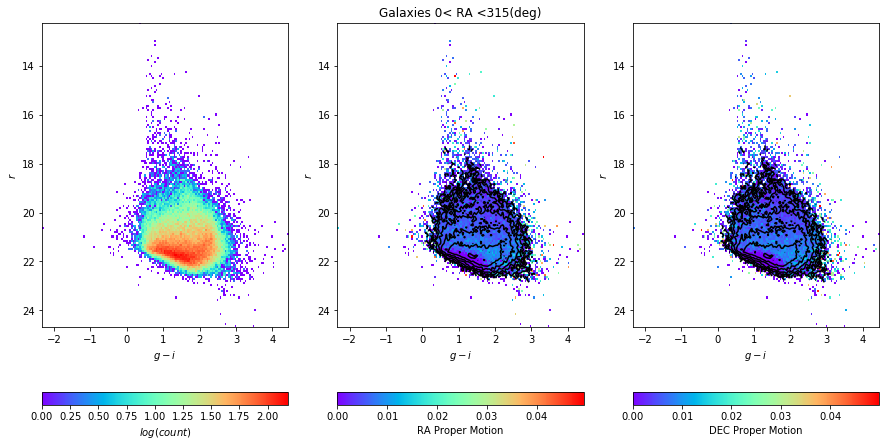

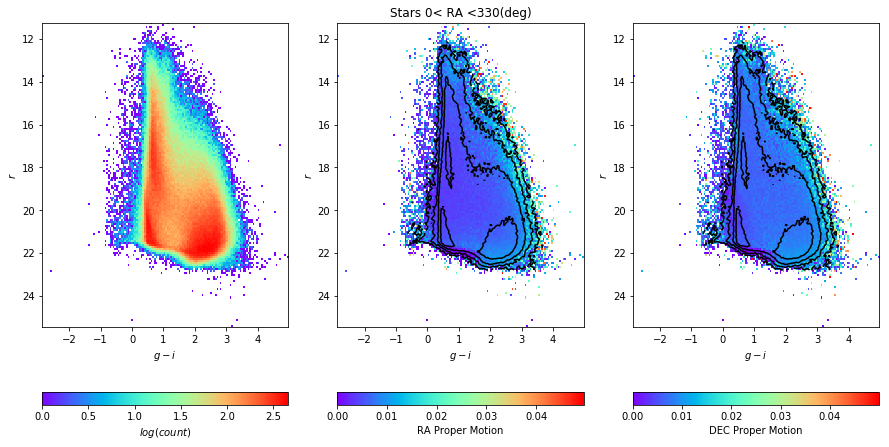

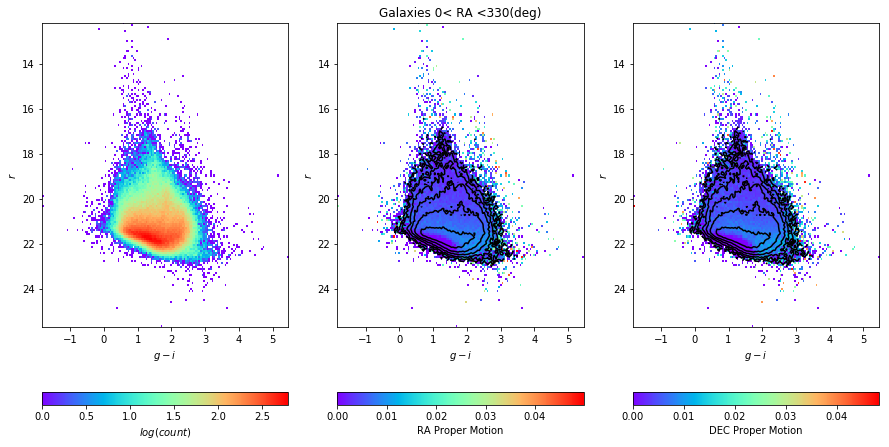

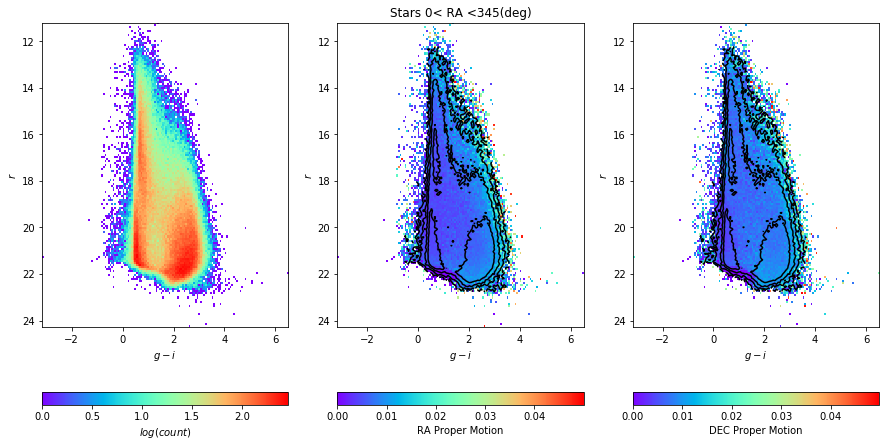

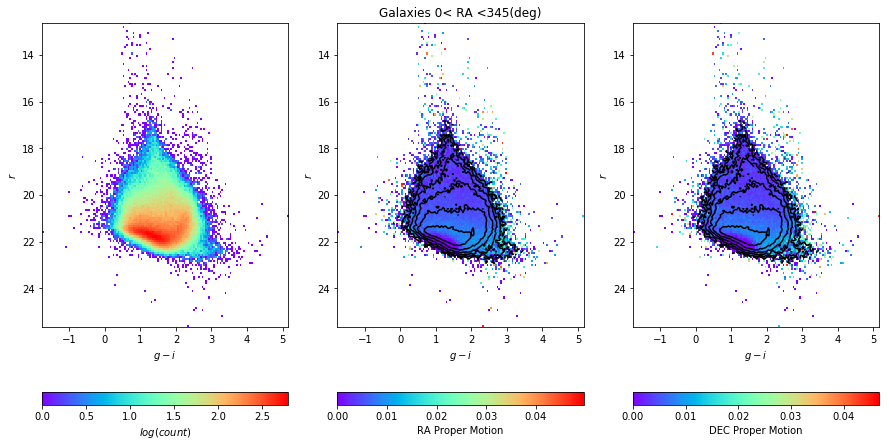

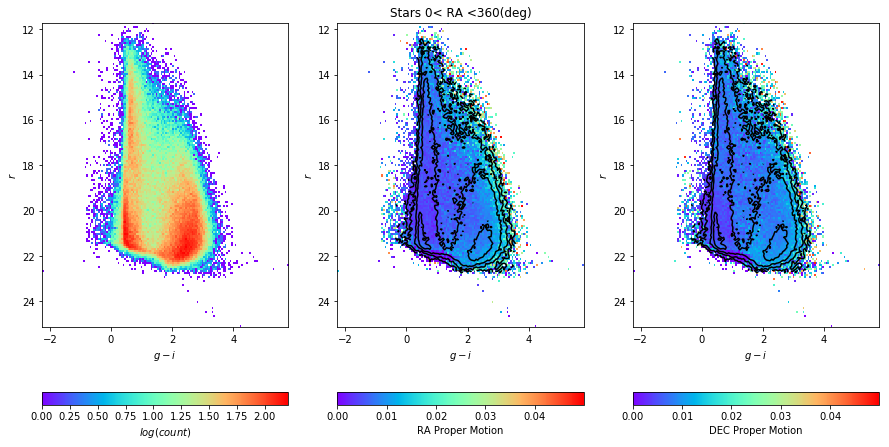

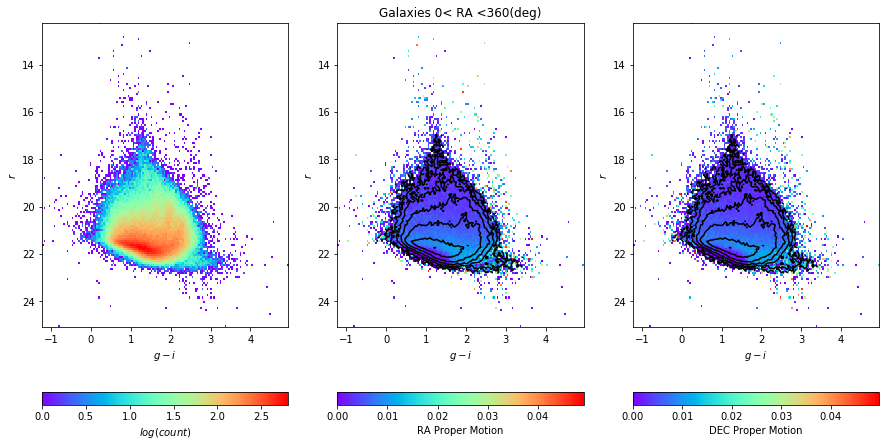

In [3]:
filenames=['HLC.RA_00_to_01.fits.gz', 'HLC.RA_01_to_02.fits.gz', 'HLC.RA_02_to_03.fits.gz', 
           'HLC.RA_03_to_04.fits.gz', 'HLC.RA_20_to_21.fits.gz', 'HLC.RA_21_to_22.fits.gz', 
           'HLC.RA_22_to_23.fits.gz', 'HLC.RA_23_to_24.fits.gz']

for name in filenames:
    plot_stars(name)
    plot_galaxies(name)

I'm not sure why my "min" and "max" RAs for my plot titles are going to different degree values from what's listed on the file; there are probably some objects that are missing information. However, using 150 bins showed great structure for the galaxy proper motions and was a bit dangerous to use for stars ($0<RA<49 deg$ or $03<RA<04 hr$, in particular). There was too much structure shown.

## Other Interesting Plots  

### Proper Motion and u-r Color

I thought it would be interesting to see if there were any correlations between the distances the ojects were moving on the sky and their colors. I noticed that redder stars and bluer galaxies have larger proper motions. This may just show the color distribution we expect of stars and galaxies.

In [4]:
def pm_color(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #----filters-----#
    
    starss=table['MEAN_OBJECT_TYPE'] > 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    galaxiess=table['MEAN_OBJECT_TYPE'] < 5
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    uclip=table['MEAN_PSFMAG_CLIP'][:,0] != 0
    gclip=table['MEAN_PSFMAG_CLIP'][:,1] != 0
    rclip=table['MEAN_PSFMAG_CLIP'][:,2] != 0
    stars=starss*raclip*declip*uclip*gclip*rclip
    galaxies=galaxiess*raclip*declip*uclip*gclip*rclip

    #----proper motion----#
    
    rapm=np.abs(table['RA_PM_CLIP'])
    decpm=np.abs(table['DEC_PM_CLIP'])
    
    #---colors----#
    u=table['MEAN_PSFMAG_CLIP'][:,0]
    g=table['MEAN_PSFMAG_CLIP'][:,1]
    r=table['MEAN_PSFMAG_CLIP'][:,2]
    i=table['MEAN_PSFMAG_CLIP'][:,3]
    z=table['MEAN_PSFMAG_CLIP'][:,4]
    
    #----chi^2------#
    rachi=table['RA_CHISQ_LIN_CLIP']
    dechi=table['DEC_CHISQ_LIN_CLIP']
    
    #----Set pretty cmaps-----#
    
    copper = plt.cm.copper
    multicolor = plt.cm.rainbow
    greys= plt.cm.Greys
    
    #------stats----------#
    
    scolor, xedges, yedges = binned_statistic_2d(rapm[stars], decpm[stars], (u-r)[stars], 
                                                 'median', bins=150)
    gcolor, xedges, yedges = binned_statistic_2d(rapm[galaxies], decpm[galaxies], (u-r)[galaxies], 
                                                 'median', bins=150)
    #rapm_median, xedges, yedges = binned_statistic_2d(g-i[m], r[m], rapm[m], 'median', bins=150)
    #decpm_median, xedges, yedges = binned_statistic_2d(g-i[m], r[m], decpm[m],'median', bins=150)
    
    #---------------------------proper motion comparison----------------------------#
    fig = plt.figure(figsize=[15,8])
    #-----stars------#
    ax = plt.subplot(121)
    plt.title('Stars' + " " + str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))) + "(deg)")
    plt.xlabel('$RA PM$')
    plt.ylabel('$DEC PM$')
    plt.imshow(scolor.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('$u-r$')
    
    #----galaxies-----#
    ax = plt.subplot(122)
    plt.title('Galaxies' + " " + str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))) + "(deg)")
    plt.xlabel('$RA PM$')
    plt.ylabel('$DEC PM$')
    plt.imshow(gcolor.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
        yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    cb = plt.colorbar(orientation='horizontal')
    cb.set_label('$u-r$')


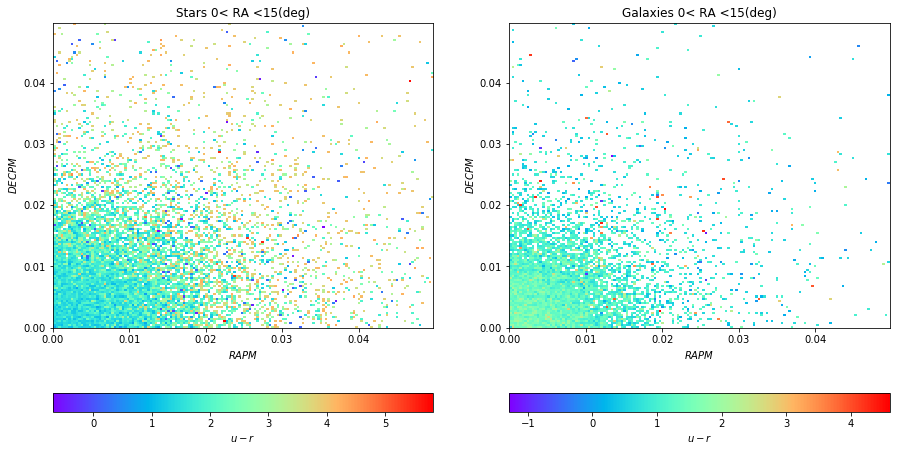

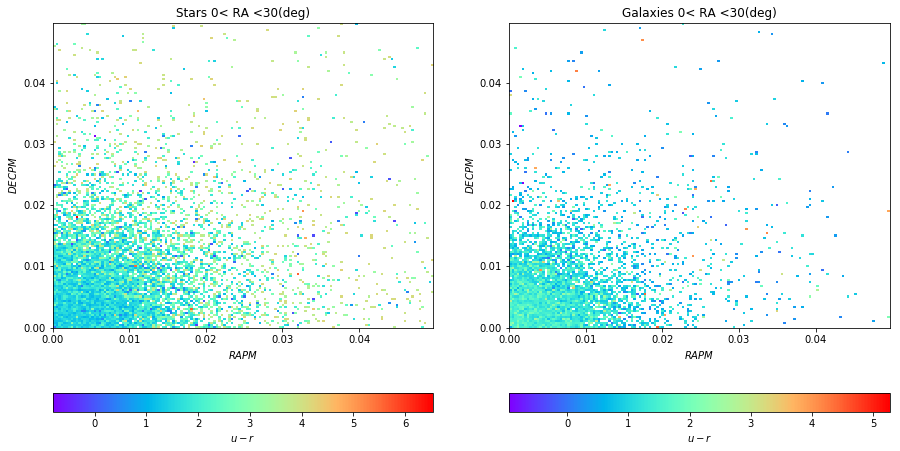

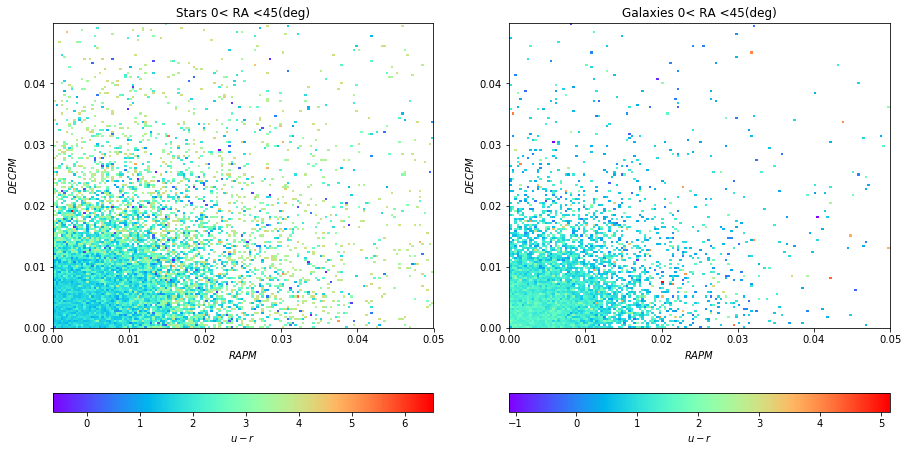

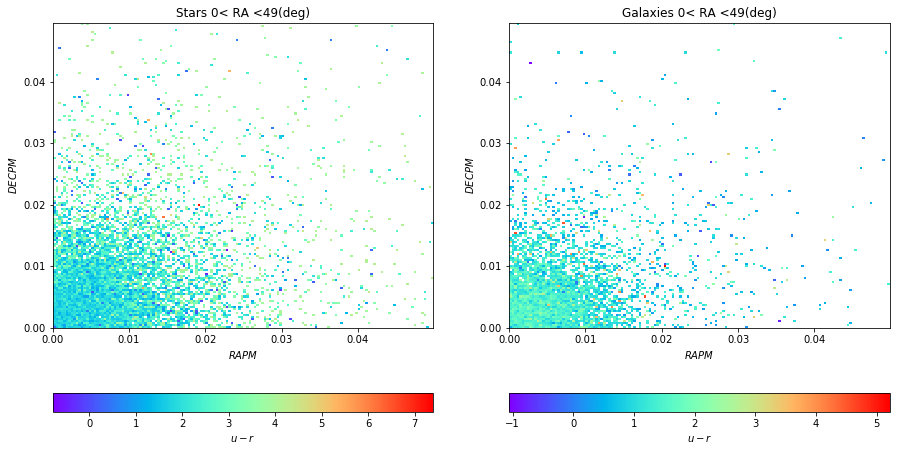

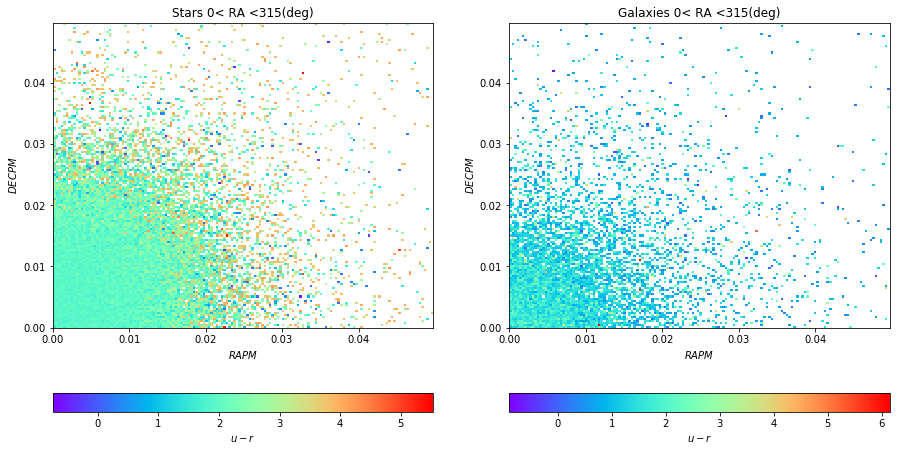

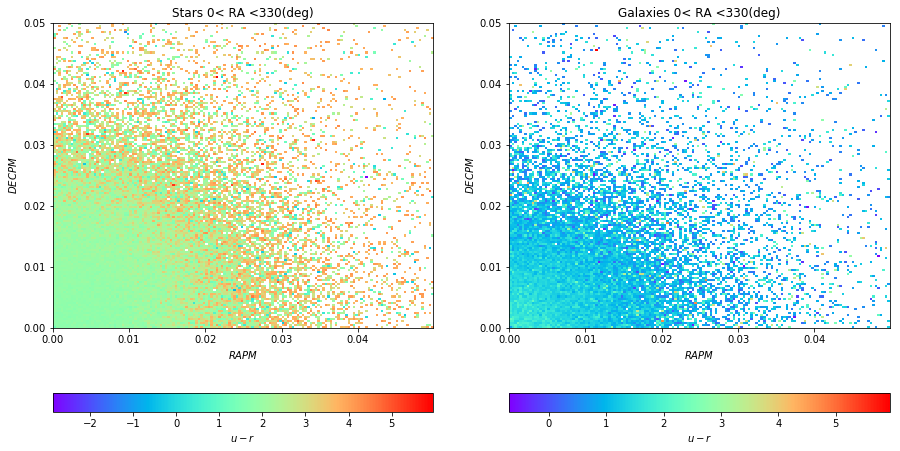

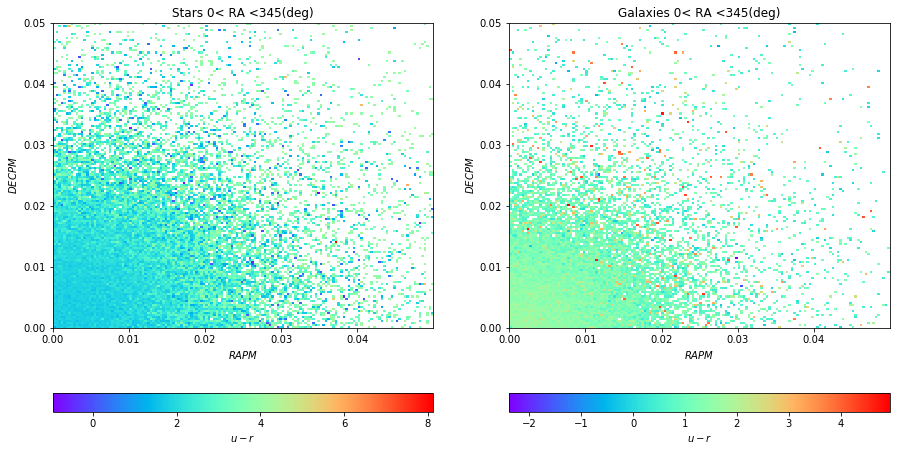

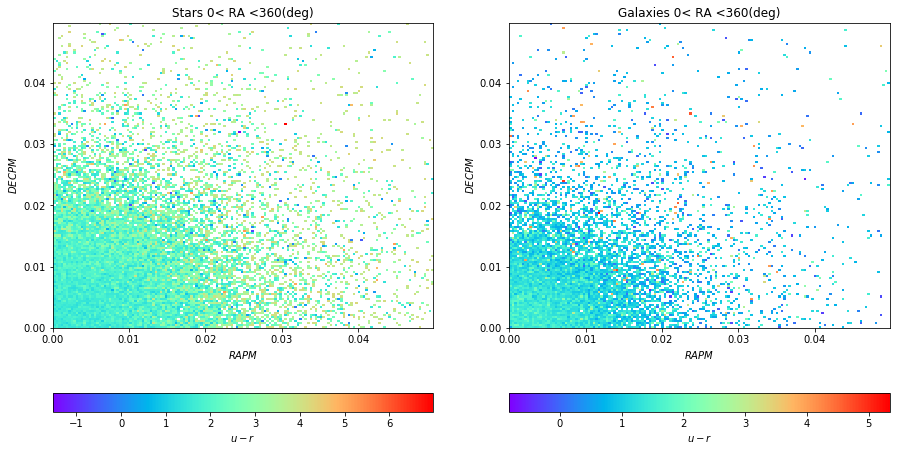

In [5]:
for name in filenames:
    pm_color(name)

### $\chi^2$ Histograms

Since $\chi^2$ was provided, it would also be nice to see its distribution for the clipped RA and DEC values from a position and proper motion model. We could use it to test for reliability between the files. It is expected that stars have greater uncertainties than galaxies, since they are much closer.

In [6]:
def chisq_stars(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #----filters-----#
    
    starss=table['MEAN_OBJECT_TYPE'] > 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    galaxiess=table['MEAN_OBJECT_TYPE'] < 5
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    stars=starss*raclip*declip
    galaxies=galaxiess*raclip*declip
    
    table=table[stars]
    
    #----chi^2------#
    rachi=table['RA_CHISQ_LIN_CLIP']
    dechi=table['DEC_CHISQ_LIN_CLIP']   
    #---------------------------proper motion chi^2----------------------------#
    #fig = plt.figure(figsize=[15,8])
    #-----stars------#
    
    #---bin size (robust)---$
    iqrx=scipy.stats.iqr(rachi)
    xw=(2*iqrx)/len(rachi)**(1/3)
    xbins=np.arange(0,max(rachi), xw)

    iqry=scipy.stats.iqr(dechi)
    yw=(2*iqry)/len(dechi)**(1/3)
    ybins=np.arange(0,max(dechi), yw)
    
    ax = plt.subplot(121)
    plt.title('Stars')
    plt.xlabel('RA $\chi^2$')
    plt.hist(rachi, bins=xbins, histtype='step', label= str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))))
    plt.xlim(0,100)
    #plt.ylim(0,4200)
    plt.legend()
    plt.tight_layout()
    ax = plt.subplot(122)
    plt.hist(dechi, bins=xbins, histtype='step', label=str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))))
    plt.xlabel('DEC $\chi^2$')
    plt.xlim(0,100)
    #plt.ylim(0,4200)
    plt.legend()
    plt.tight_layout()
    
    
    
    
def chisq_galaxies(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #----filters-----#
    
    starss=table['MEAN_OBJECT_TYPE'] < 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    galaxiess=table['MEAN_OBJECT_TYPE'] < 5
    raclip=np.abs(table['RA_PM_CLIP']) < 0.05
    declip=np.abs(table['DEC_PM_CLIP']) < 0.05
    stars=starss*raclip*declip
    galaxies=galaxiess*raclip*declip
    
    table=table[galaxies]
    
    #----chi^2------#
    rachi=table['RA_CHISQ_LIN_CLIP']
    dechi=table['DEC_CHISQ_LIN_CLIP']   
    #---------------------------proper motion chi^2----------------------------#
    #fig = plt.figure(figsize=[15,8])
    #-----stars------#
    
    #---bin size (robust)---$
    iqrx=scipy.stats.iqr(rachi)
    xw=(2*iqrx)/len(rachi)**(1/3)
    xbins=np.arange(0,max(rachi), xw)

    iqry=scipy.stats.iqr(dechi)
    yw=(2*iqry)/len(dechi)**(1/3)
    ybins=np.arange(0,max(dechi), yw)
    
    ax = plt.subplot(121)
    plt.title('Galaxies')
    plt.xlabel('RA $\chi^2$')
    plt.hist(rachi, bins=xbins, histtype='step', label= str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))))
    plt.xlim(0,200)
    #plt.ylim(0,4200)
    plt.legend()
    plt.tight_layout()
    ax = plt.subplot(122)
    plt.hist(dechi, bins=xbins, histtype='step', label=str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))))
    plt.xlabel('DEC $\chi^2$')
    plt.xlim(0,200)
    #plt.ylim(0,4200)
    plt.legend()
    plt.tight_layout()

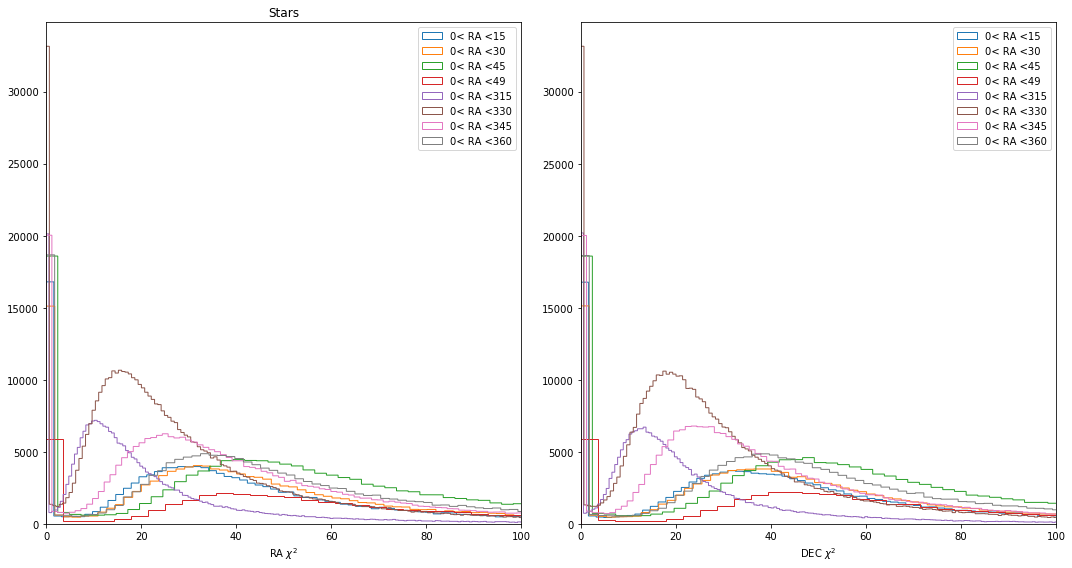

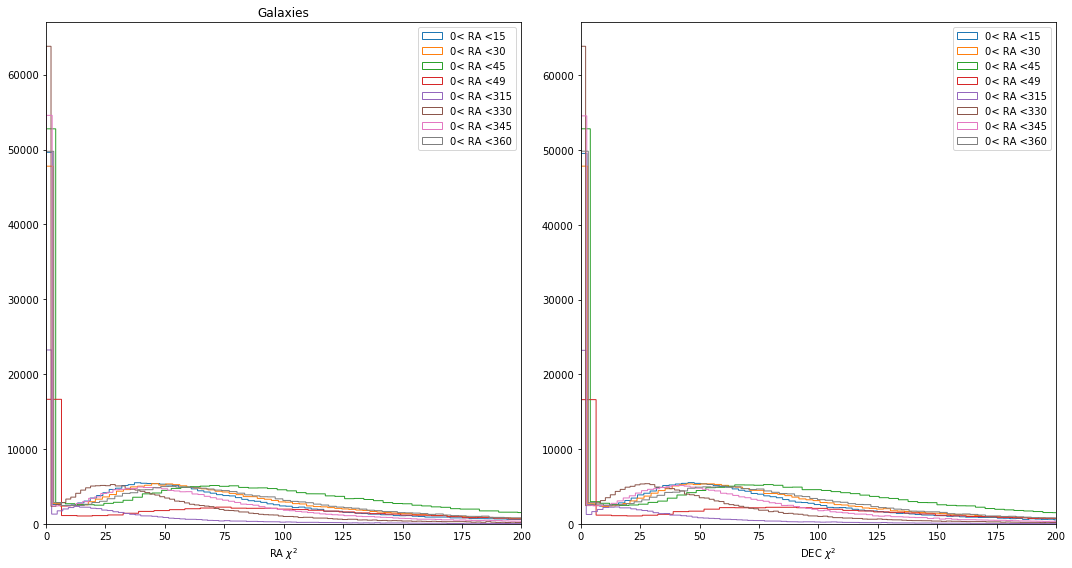

In [7]:
fig = plt.figure(figsize=[15,8])

for name in filenames:
    chisq_stars(name)

fig = plt.figure(figsize=[15,8])

for name in filenames:
    chisq_galaxies(name)

### Exponential vs. PSF Magnitude

Finally, we can plot the exponential and psf magnitude g-band errors against each other to decide which one is more reliable. A $\chi^2$ plot will be a great next step to see the correlations better, but the slopes of the largest correlations look like they tend toward the psf error values being more accurate. 

In [10]:
def magc_stars(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #------filters----------#
    
    stars=table['MEAN_OBJECT_TYPE'] > 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    #galaxies=table['MEAN_OBJECT_TYPE'] < 5
    
    table=table[stars]
    #---magnitude errors (g band)---#

    psferrg=table['MEAN_PSFMAG_ERR_CLIP'][:,1]
    experrg=table['MEAN_EXPMAG_ERR_CLIP'][:,1]

    
    #------------------------------plot------------------------------#
    #multicolor = plt.cm.rainbow
    
    #magc, xedges, yedges = binned_statistic_2d(psferr, experr, psferr, 
    #                                           'count', bins=150)
    
    #plt.imshow(magc.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
    #    yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    
    fig = plt.figure(figsize=[15,8])
    
    plt.title('Stars' + " " + str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))) + "(deg)")
    plt.xlabel('PSF ERR CLIP')
    plt.ylabel('EXP ERR CLIP')
    plt.xlim(0,1.5)
    plt.ylim(0,1)
    plt.scatter(psferrg,experrg, s=2, color='k')
    
    
    
def magc_galaxies(filename):
    #---------------------------read table----------------------------#
    table = Table.read(filename)
    
    #---ra and dec---#
    
    ra=table['RA_MEAN_CLIP']
    dec=table['DEC_MEAN_CLIP']
    
    #------filters----------#
    
    galaxies=table['MEAN_OBJECT_TYPE'] < 5 #np.where(table['MEAN_OBJECT_TYPE']>5)[0]
    #galaxies=table['MEAN_OBJECT_TYPE'] < 5
    
    table=table[galaxies]
    #---magnitude errors---#
    
    psferrg=table['MEAN_PSFMAG_ERR_CLIP'][:,1]
    experrg=table['MEAN_EXPMAG_ERR_CLIP'][:,1]
    
    #------------------------------plot------------------------------#
    #multicolor = plt.cm.rainbow
    
    #magc, xedges, yedges = binned_statistic_2d(psferr, experr, psferr, 
    #                                           'count', bins=150)
    
    #plt.imshow(magc.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], 
    #    yedges[-1]], aspect='auto', interpolation='nearest', cmap=multicolor)
    
    fig = plt.figure(figsize=[15,8])
    
    plt.title('Galaxies' + " " + str(int(round(min(ra)))) + '< RA <' + 
              str(int(round(max(ra)))) + "(deg)")
    plt.xlabel('PSF ERR CLIP')
    plt.ylabel('EXP ERR CLIP')
    plt.xlim(0,1.5)
    plt.ylim(0,1)
    plt.scatter(psferrg,experrg, s=2, color='k')

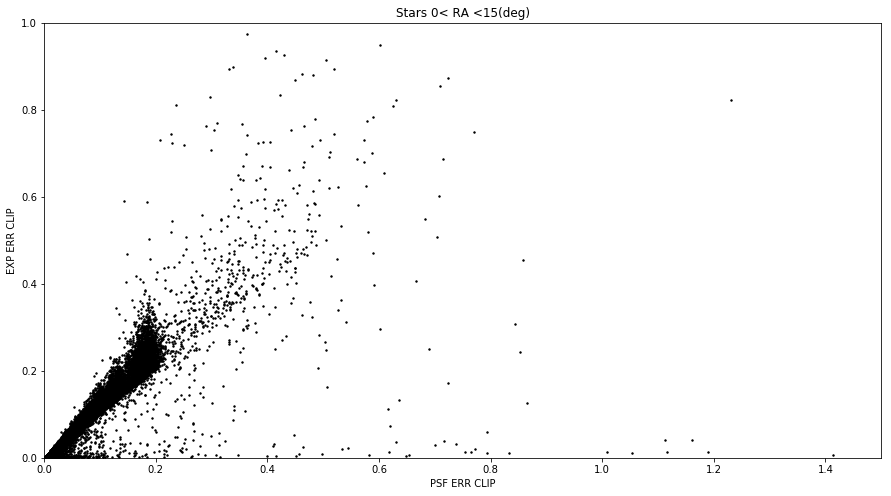

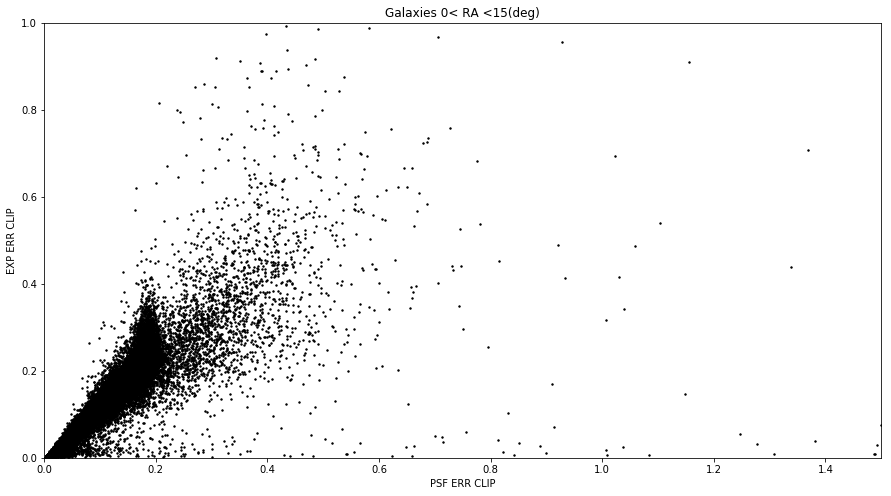

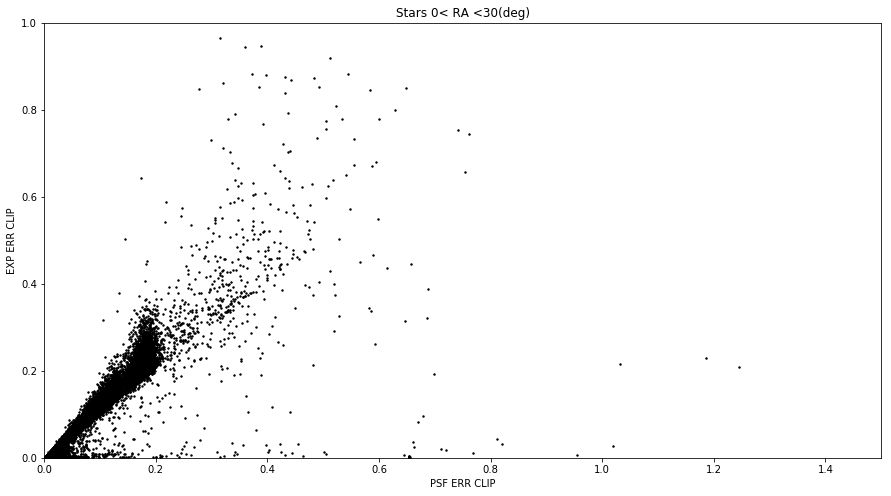

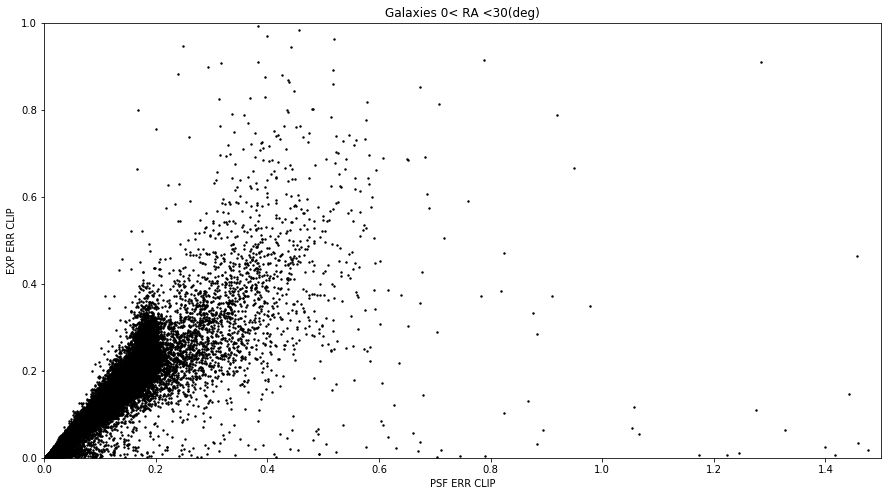

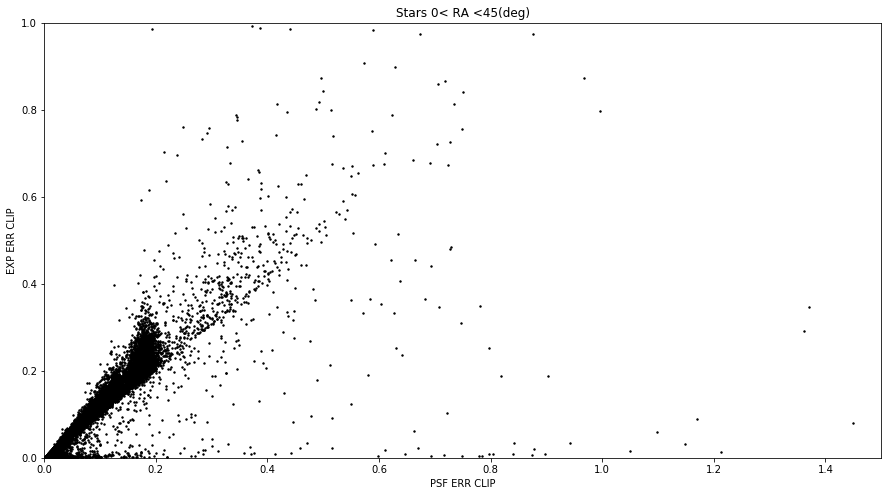

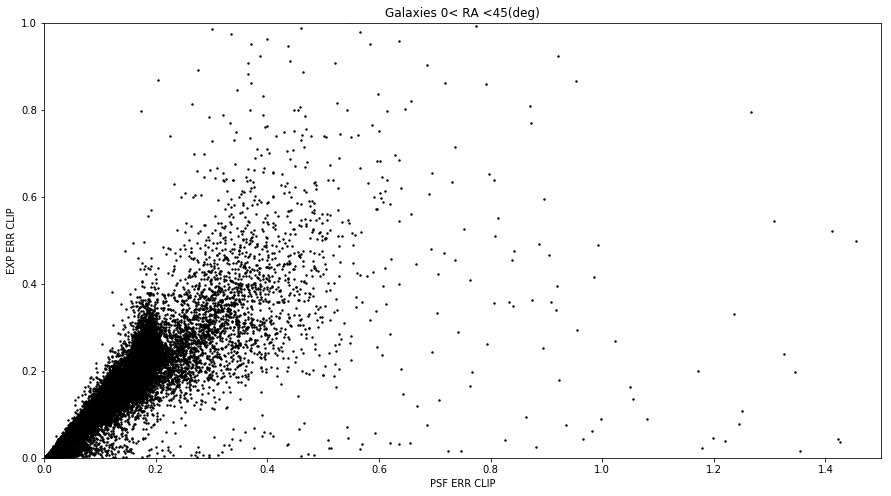

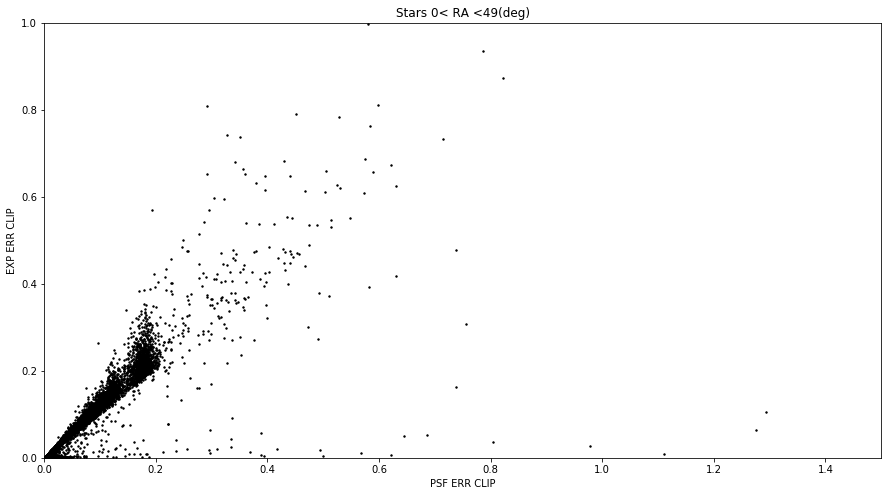

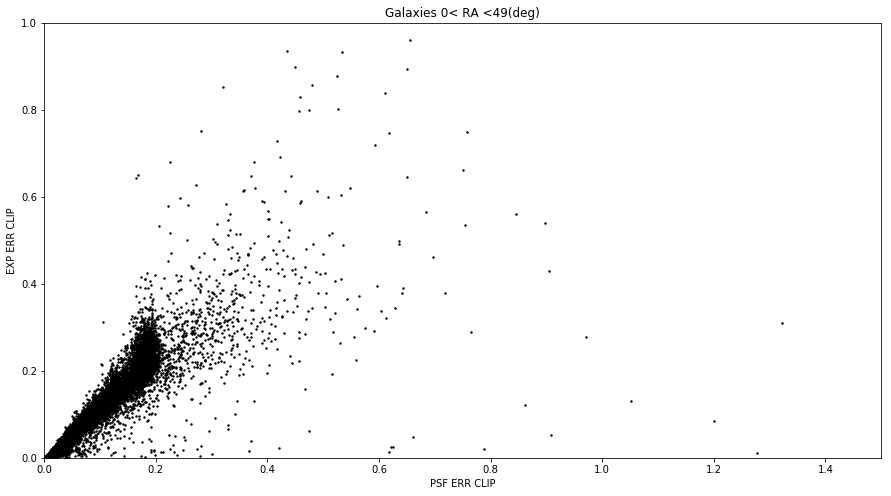

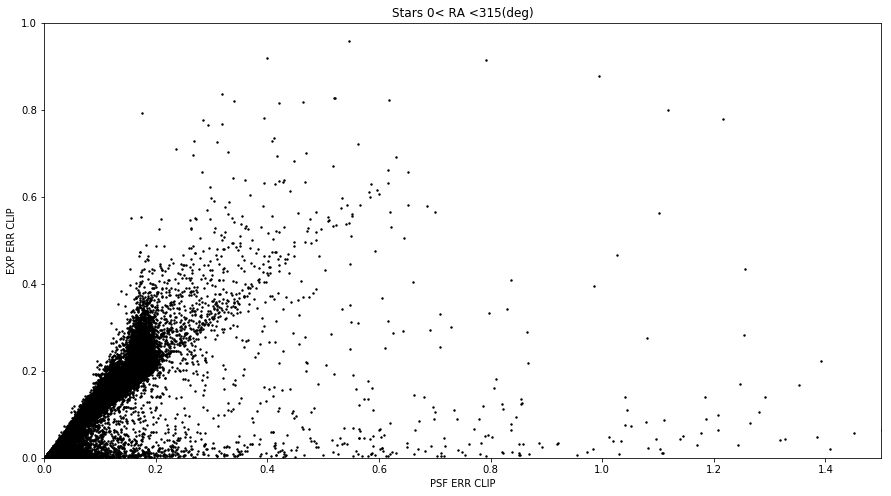

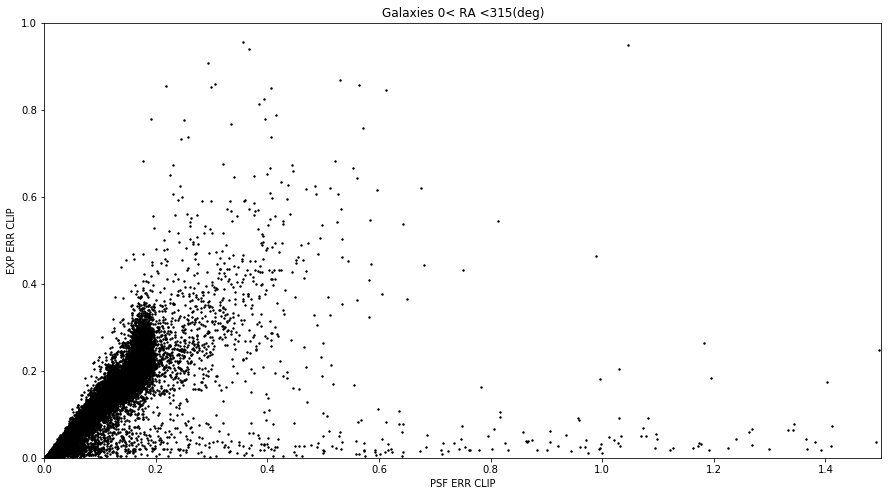

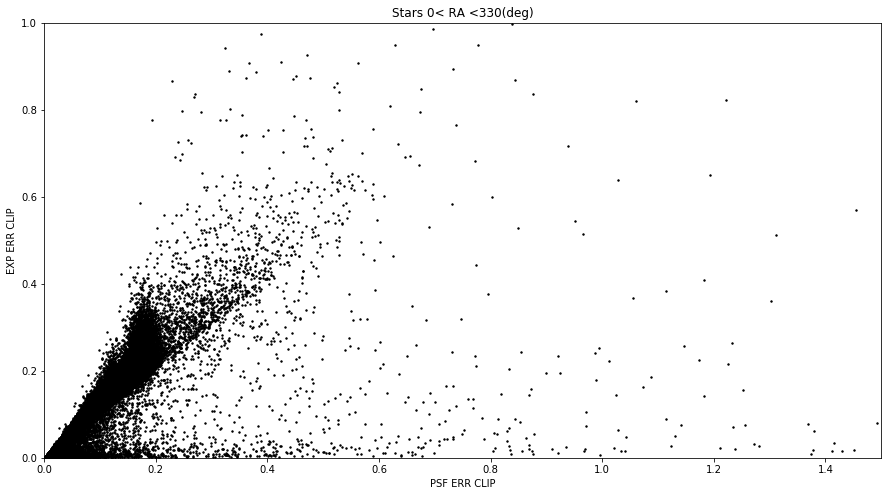

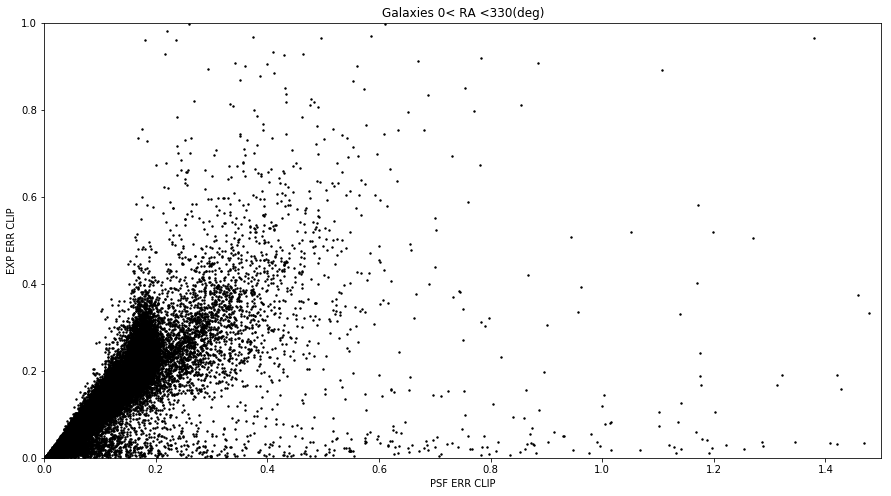

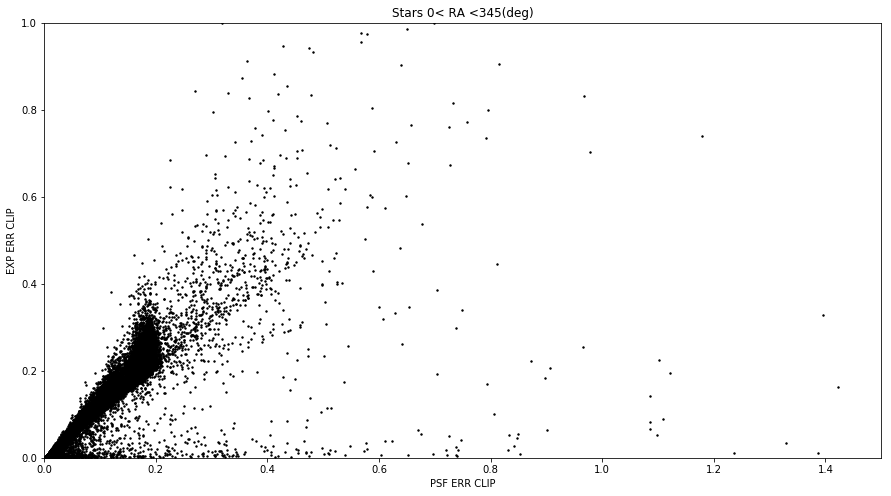

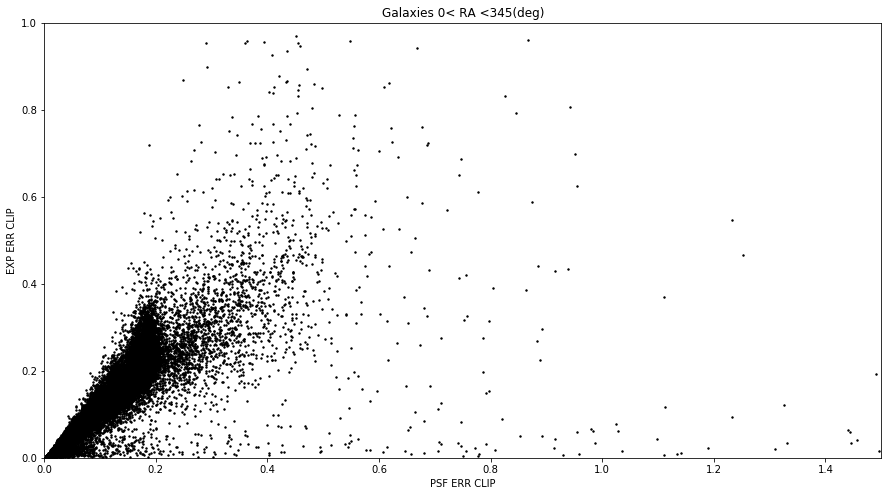

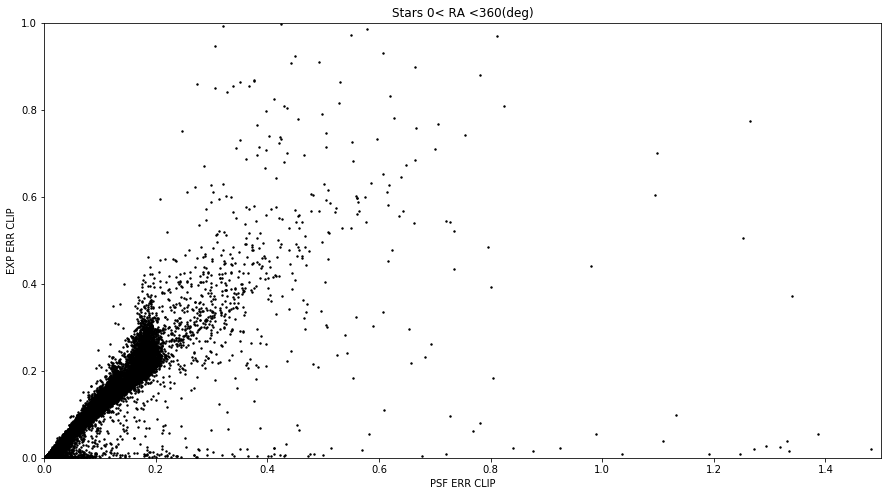

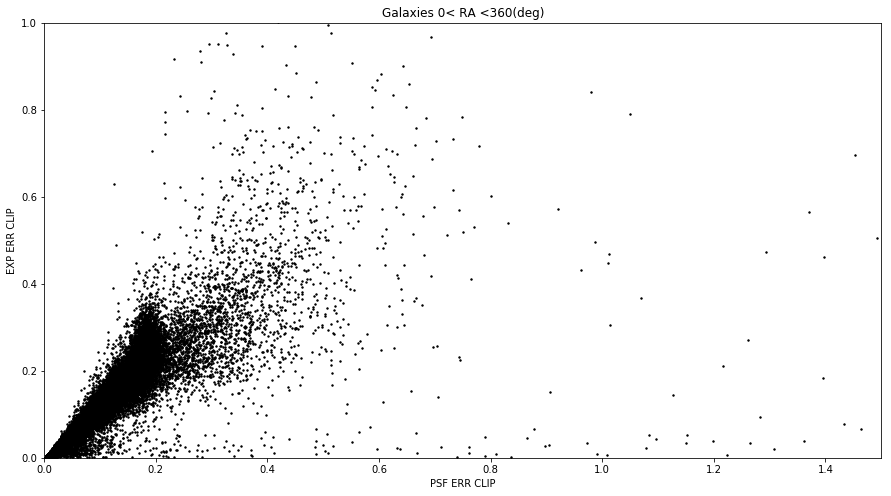

In [12]:
filenames=['HLC.RA_00_to_01.fits.gz', 'HLC.RA_01_to_02.fits.gz', 'HLC.RA_02_to_03.fits.gz', 
           'HLC.RA_03_to_04.fits.gz', 'HLC.RA_20_to_21.fits.gz', 'HLC.RA_21_to_22.fits.gz', 
           'HLC.RA_22_to_23.fits.gz', 'HLC.RA_23_to_24.fits.gz']

for name in filenames:
    magc_stars(name)
    magc_galaxies(name)